# Dark file subtraction

In [2]:
# This module will open .tiff files and do the dark file subtraction

import numpy as np
import fabio
import glob
import os, sys


def load_tif(file):
    """
    Parameters
    ----------
    file : string
    Complete path to the file to be loaded into memory

    Returns
    -------
    output: NxN ndarray
    Returns a numpy array of the same data type as the original tiff file
    """
    image = fabio.open(file)
    image_data = image.data
    return image_data

def remove_dark(A):
    """
    This function will subtract the dark files from the data files
    Parameters
    ----------
    A : list
        list of tiff files
        
    Returns
    -------
    clean_data : array
        dark subtracted data , clean data
        shape (number of clean images, detectore shape 0, detecotor shape 1)
    """
    
    clean_data = []  # save the cleaned data
    
    for name in A:
        if "dark" in name:   # check the dark files
            dark_data = load_tif(name)  
            print ("+++++ bad" , name)
        else:
            arr = load_tif(name)
            print ("good", name)
            #  clean the data
            clean_data.append(arr - dark_data)  
    return np.asarray(clean_data)

In [3]:
data_dir = "/Volumes/MILINDA/"
A = glob.glob(os.path.join(data_dir, "*tiff"))

In [4]:
len(A)

52

In [5]:
clean_data = remove_dark(A)

+++++ bad /Volumes/MILINDA/2016-02-05_22_26_dark_Ir0.99Pt0.01Te2_['Simon', 'Billinge']_['Chia Hao', 'Liu'].tiff
good /Volumes/MILINDA/2016-02-05_22_05_Ir0.99Pt0.01Te2_['Simon', 'Billinge']_['Chia Hao', 'Liu']_199.93K.tiff
good /Volumes/MILINDA/2016-02-05_22_05_Ir0.99Pt0.01Te2_['Simon', 'Billinge']_['Chia Hao', 'Liu']_194.62K.tiff
good /Volumes/MILINDA/2016-02-05_22_05_Ir0.99Pt0.01Te2_['Simon', 'Billinge']_['Chia Hao', 'Liu']_189.01K.tiff
good /Volumes/MILINDA/2016-02-05_22_05_Ir0.99Pt0.01Te2_['Simon', 'Billinge']_['Chia Hao', 'Liu']_183.45K.tiff
good /Volumes/MILINDA/2016-02-05_22_05_Ir0.99Pt0.01Te2_['Simon', 'Billinge']_['Chia Hao', 'Liu']_177.87K.tiff
good /Volumes/MILINDA/2016-02-05_22_05_Ir0.99Pt0.01Te2_['Simon', 'Billinge']_['Chia Hao', 'Liu']_172.32K.tiff
good /Volumes/MILINDA/2016-02-05_22_05_Ir0.99Pt0.01Te2_['Simon', 'Billinge']_['Chia Hao', 'Liu']_166.77K.tiff
good /Volumes/MILINDA/2016-02-05_22_05_Ir0.99Pt0.01Te2_['Simon', 'Billinge']_['Chia Hao', 'Liu']_161.22K.tiff
good /Vo

In [6]:
clean_data.shape

(45, 2048, 2048)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

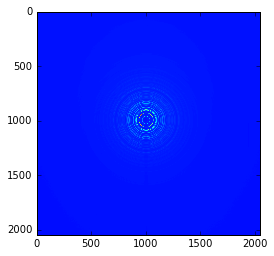

In [8]:
fig = plt.subplot()
plt.imshow(clean_data[0])